# Logistische Regression

## Quelle der Daten

https://www.kaggle.com/datasets/captainozlem/framingham-chd-preprocessed-data (zuletzt aufgerufen: 01/2024)

https://www.framinghamheartstudy.org/ (zuletzt aufgerufen: 01/2024)

## Installation der Bibliotheken

In [27]:
import pandas as pd

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import numpy as np

## Einlesen der Daten

In [28]:
data = pd.read_excel("C:\\Users\\Tim\\Desktop\\Buchprojekt KI Medizin\\Programmierung\\FraminghamHeartStudy.xlsx", sheet_name = "Tabelle1")

data = data.dropna()

data.head()

,ZehnJahreKHK,Geschlecht,Alter,Raucher,ZigProTag,BDMedikamente,Schlaganfall,ArtHypertonie,Diabetes,GesCholesterin,Systolisch,Diastolisch,BMI,Herzfrequenz,Blutzucker
1,0,M,38,1,20.0,0.0,0,0,0,113.0,120,84,30.0,78.0,85.0
2,0,M,47,1,20.0,0.0,0,0,0,119.0,117,79,26.0,75.0,78.0
3,1,M,66,0,0.0,0.0,0,1,0,124.0,138,91,32.0,75.0,96.0
6,1,M,51,1,7.0,0.0,0,1,0,133.0,138,78,17.0,80.0,65.0
7,0,W,36,1,3.0,0.0,0,0,0,135.0,108,74,23.0,73.0,75.0


In [29]:
data_new = pd.get_dummies(data, columns = ["Geschlecht"])

data_new.head()

,ZehnJahreKHK,Alter,Raucher,ZigProTag,BDMedikamente,Schlaganfall,ArtHypertonie,Diabetes,GesCholesterin,Systolisch,Diastolisch,BMI,Herzfrequenz,Blutzucker,Geschlecht_M,Geschlecht_W
1,0,38,1,20.0,0.0,0,0,0,113.0,120,84,30.0,78.0,85.0,1,0
2,0,47,1,20.0,0.0,0,0,0,119.0,117,79,26.0,75.0,78.0,1,0
3,1,66,0,0.0,0.0,0,1,0,124.0,138,91,32.0,75.0,96.0,1,0
6,1,51,1,7.0,0.0,0,1,0,133.0,138,78,17.0,80.0,65.0,1,0
7,0,36,1,3.0,0.0,0,0,0,135.0,108,74,23.0,73.0,75.0,0,1


<Axes: >

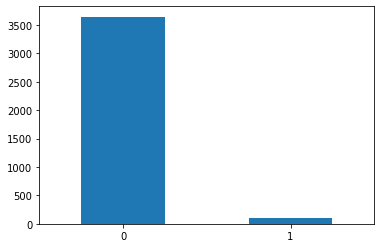

In [4]:
count_diabetes = data_new["Diabetes"].value_counts()

count_diabetes.plot(kind = "bar", rot = 0)

## Aufteilung der Daten und Resampling

In [30]:
x = data_new.iloc[:, 13].values.reshape(-1, 1)

y = data_new.iloc[:, 7]

In [31]:
print(x)

[[ 85.]
 [ 78.]
 [ 96.]
 ...
 [ 90.]
 [110.]
 [ 72.]]


In [32]:
print(y)

1       0
2       0
3       0
6       0
7       0
       ..
4181    0
4182    0
4183    0
4184    0
4185    0
Name: Diabetes, Length: 3747, dtype: int64


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [18]:
sm = SMOTE()

x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

print(y_train_res.value_counts())

0    3097
1    3097
Name: Diabetes, dtype: int64


## Definition, Training und Evaluation des Modells

In [19]:
model = LogisticRegression()

model.fit(x_train_res, y_train_res)

model.score(x_test, y_test)

0.9413854351687388

Text(0, 0.5, 'Diabetes')

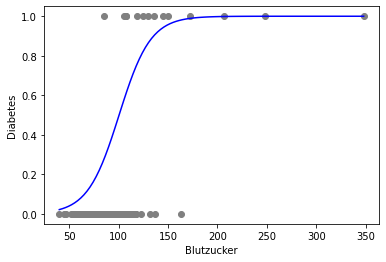

In [20]:
plt.scatter(x_test, y_test, color = "gray")

x_values = np.linspace(min(x_test), max(x_test), 100).reshape(-1, 1)
y_pred = model.predict_proba(x_values)[:, 1]

plt.plot(x_values, y_pred, color = "blue")

plt.xlabel("Blutzucker")
plt.ylabel("Diabetes")

In [21]:
x = data_new.iloc[:, [1, 8, 13]]

y = data_new.iloc[:, 7]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [22]:
sm = SMOTE()

x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

print(y_train_res.value_counts())

0    3091
1    3091
Name: Diabetes, dtype: int64


In [23]:
model_2 = LogisticRegression()

model_2.fit(x_train_res, y_train_res)

model_2.score(x_test, y_test)

0.9094138543516874